# Download Required Packages

In [1]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [28]:
data = np.genfromtxt('./Housing.csv', delimiter=',', dtype='longlong', encoding='utf-8')
data = np.delete(data, 0, 0)
print(data)

[[      0      -1  787500 ...    1974       4    1895]
 [      0      -1  149900 ...    1995       4    1192]
 [      0      -1  299900 ...    1995       4    2110]
 ...
 [     50      -1 1425000 ...    1860       6    5936]
 [     26      -1  339000 ...    1955       6    1280]
 [     80      -1  565000 ...    1960      -1    1359]]


# Plot Sqft Area vs Price

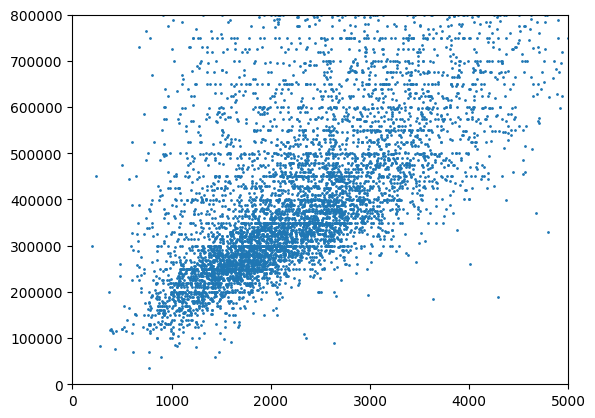

In [29]:
plt.xlim([0,5000])
plt.ylim([0,800_000])
plt.scatter(data[:, 4], data[:, 2], s=1)

# Run 2D Gradient Descent Algo

[0/20]: x0 = -0.43254330306867894 x1=289.41201747990027


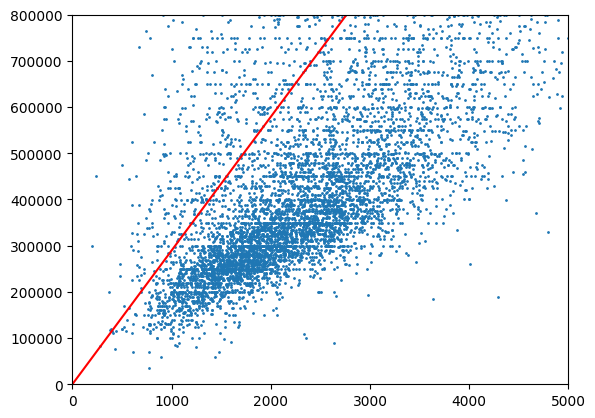

[1/20]: x0 = -0.952378992110413 x1=289.4122231703044


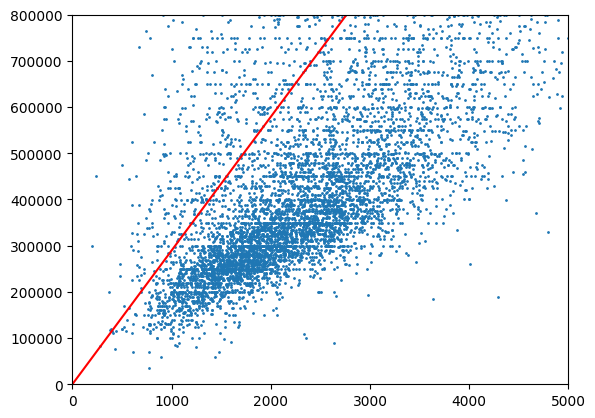

[2/20]: x0 = -1.4722138613567406 x1=289.4124288603839


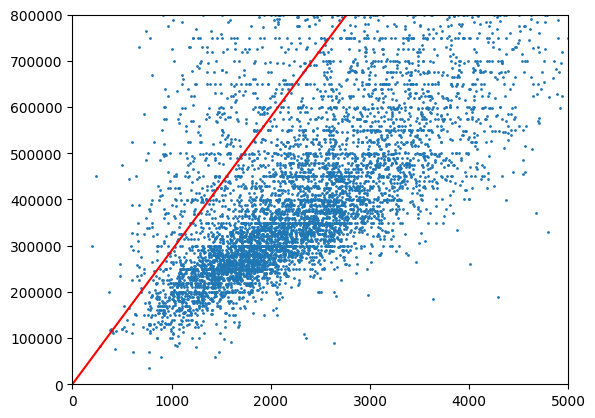

[3/20]: x0 = -1.9920479108089524 x1=289.4126345501396


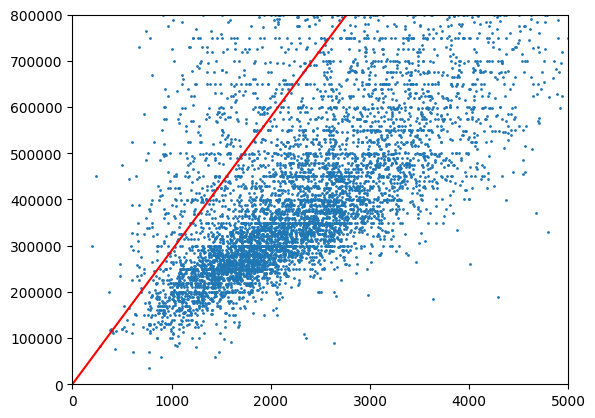

[4/20]: x0 = -2.511881140468352 x1=289.4128402395703


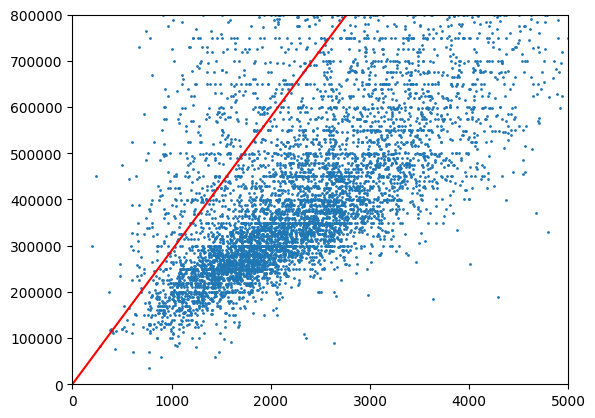

[5/20]: x0 = -3.0317135503362223 x1=289.4130459286769


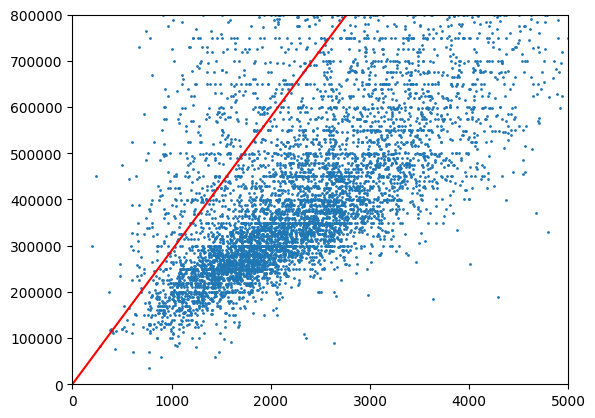

[6/20]: x0 = -3.551545140413887 x1=289.41325161745937


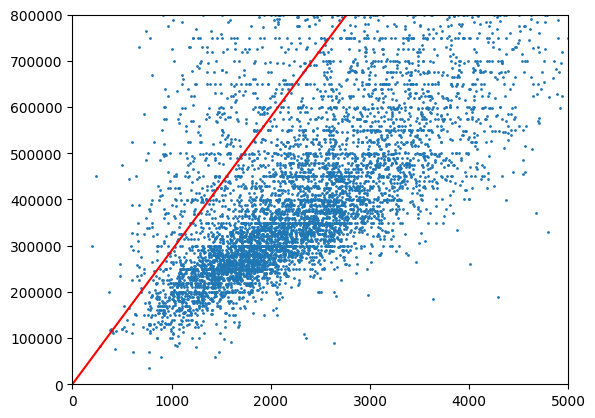

[7/20]: x0 = -4.07137591070261 x1=289.41345730591723


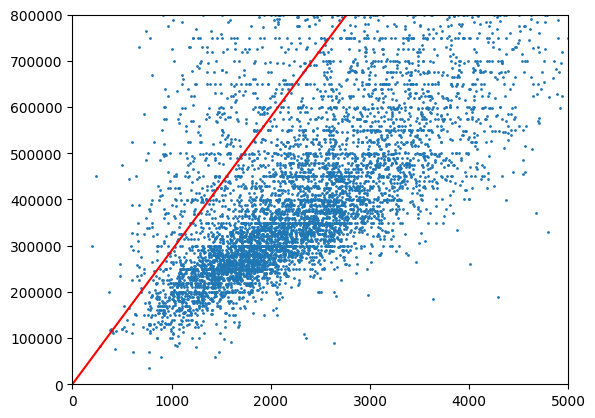

[8/20]: x0 = -4.591205861203672 x1=289.41366299405036


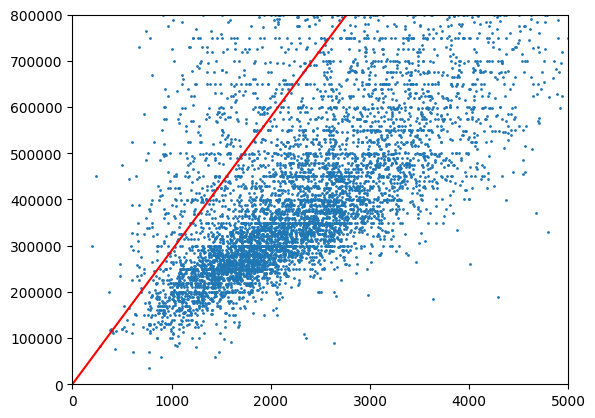

[9/20]: x0 = -5.111034991918391 x1=289.4138686818595


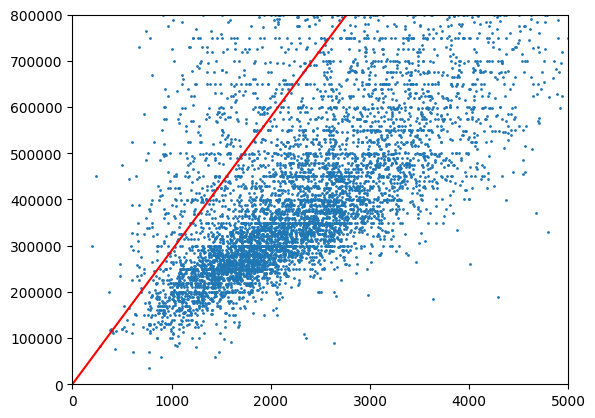

[10/20]: x0 = -5.6308633028480495 x1=289.4140743693443


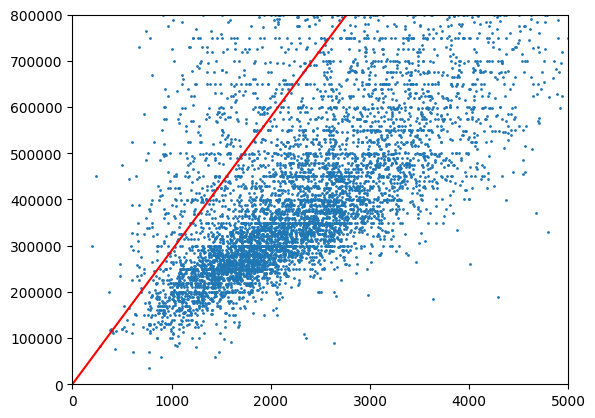

[11/20]: x0 = -6.150690793993907 x1=289.4142800565047


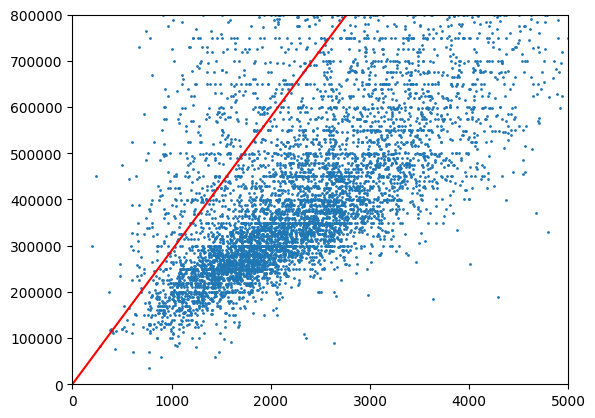

[12/20]: x0 = -6.670517465357286 x1=289.4144857433407


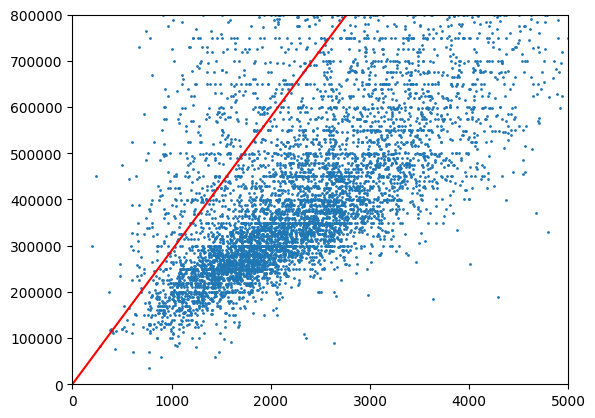

[13/20]: x0 = -7.190343316939513 x1=289.4146914298522


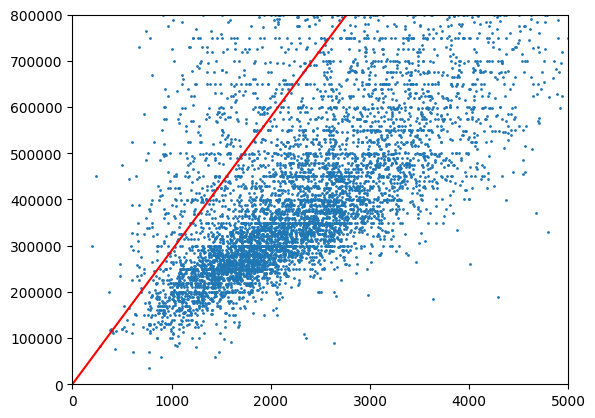

[14/20]: x0 = -7.710168348741826 x1=289.41489711603947


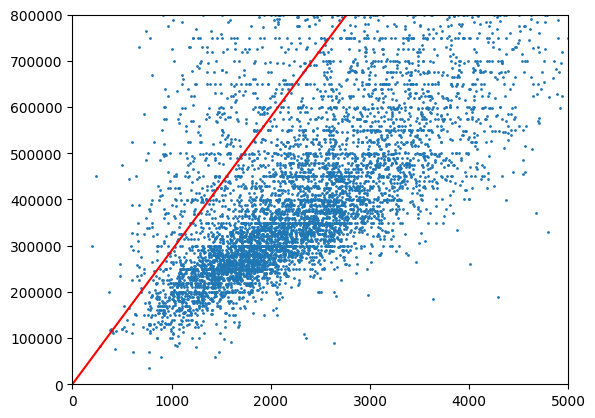

[15/20]: x0 = -8.229992560765538 x1=289.41510280190226


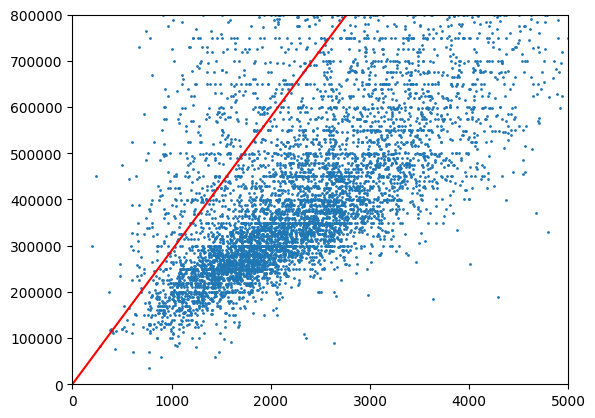

[16/20]: x0 = -8.749815953011982 x1=289.4153084874407


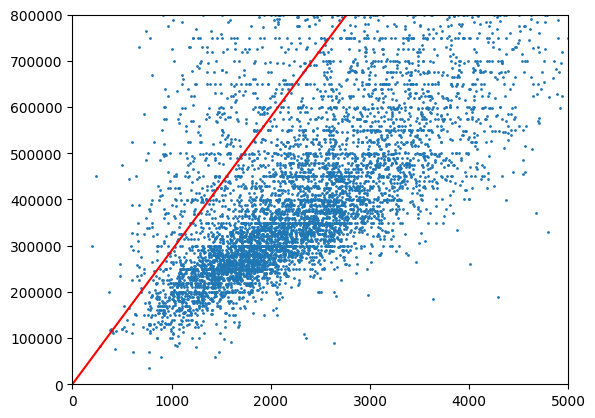

[17/20]: x0 = -9.26963852548247 x1=289.4155141726549


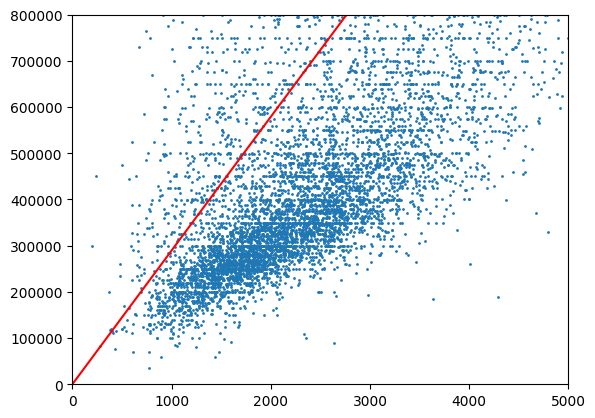

[18/20]: x0 = -9.789460278178192 x1=289.4157198575445


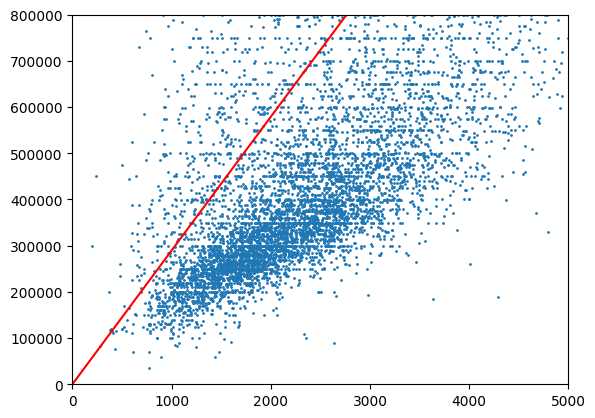

[19/20]: x0 = -10.309281211100446 x1=289.41592554210996


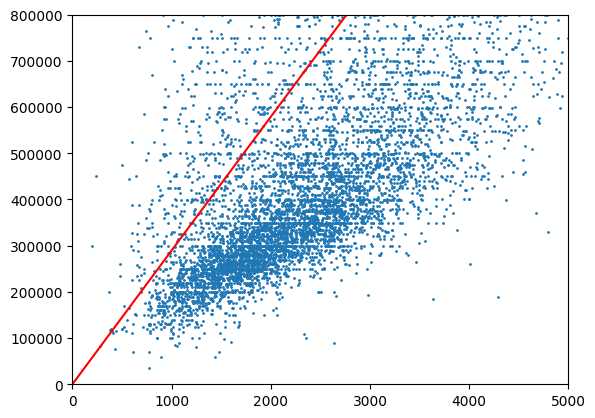

array([[-10.30928121],
       [289.41592554]])

In [30]:
placeholder_x = np.arange(np.amax(data[:, 4]))

def sgd(data, training_rate=0.000000001, iters=20):
    theta = np.array([[0],[0]])
    X = data[:, [4]]
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [2]].T[0]

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.xlim([0,5000])
        plt.ylim([0,800_000])
        plt.scatter(data[:, 4], data[:, 2], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


sgd(data)
